In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.append(os.pardir)
sys.path.append("../../")
from sklearn.datasets import load_iris
from logisticReg import Lreg
from logisticReg import binaryTarget

In [2]:
iris = load_iris()
X = iris.data
Y = iris.target
y_name = iris.target_names

In [3]:
# 인덱스 suffle
suffle_mask = np.random.choice(X.shape[0],X.shape[0],replace=False)
# data 80퍼센트는 Train용, 20퍼센트는 Test용
bound = int(0.8 * X.shape[0])

x_train = X[suffle_mask[:bound]]
x_test = X[suffle_mask[bound:]]
y_train = Y[suffle_mask[:bound]]
y_test = Y[suffle_mask[bound:]]



# binary에 맞는 정답 데이터를 만든다
# multi class의 학습 코드를 재사용하기 위해서, numpy차원을 (data * 1)로 맞춰준다.
y0_train = binaryTarget(y_train,target = 0)
y1_train = binaryTarget(y_train,target = 1)
y2_train = binaryTarget(y_train,target = 2)

y0_test =  binaryTarget(y_test,target = 0)
y1_test =  binaryTarget(y_test,target = 1)
y2_test =  binaryTarget(y_test,target = 2)

In [4]:
reg0 = Lreg(X.shape[1],y_name.shape[0],"b")
reg1 = Lreg(X.shape[1],y_name.shape[0],"b")
reg2 = Lreg(X.shape[1],y_name.shape[0],"b")

In [5]:
# 여러 hyper Parmeter로 실험해보기위해
# 매 learning마다 weight를 초기화 해본다.
reg0.reset_weight()
reg1.reset_weight()
reg2.reset_weight()

# class 3개에대한 각 모델 학습시작
reg0.learn(x_train,y0_train,epoch=100,batch_size=x_train.shape[0],lr = 0.07)
reg1.learn(x_train,y1_train,epoch=100,batch_size=x_train.shape[0],lr = 0.07)
reg2.learn(x_train,y2_train,epoch=100,batch_size=x_train.shape[0],lr = 0.07)

Before Learning:
| Train_Accuracy: 0.058333333333333334 | COST: [1.399]
1
| Train_Accuracy: 0.5583333333333333 | COST: [0.961]
2
| Train_Accuracy: 0.6166666666666667 | COST: [0.911]
3
| Train_Accuracy: 0.625 | COST: [0.870]
4
| Train_Accuracy: 0.6333333333333333 | COST: [0.831]
5
| Train_Accuracy: 0.6416666666666667 | COST: [0.793]
6
| Train_Accuracy: 0.6416666666666667 | COST: [0.757]
7
| Train_Accuracy: 0.65 | COST: [0.723]
8
| Train_Accuracy: 0.65 | COST: [0.690]
9
| Train_Accuracy: 0.65 | COST: [0.659]
10
| Train_Accuracy: 0.6583333333333333 | COST: [0.629]
11
| Train_Accuracy: 0.6583333333333333 | COST: [0.601]
12
| Train_Accuracy: 0.6583333333333333 | COST: [0.574]
13
| Train_Accuracy: 0.675 | COST: [0.549]
14
| Train_Accuracy: 0.675 | COST: [0.526]
15
| Train_Accuracy: 0.7 | COST: [0.503]
16
| Train_Accuracy: 0.7166666666666667 | COST: [0.482]
17
| Train_Accuracy: 0.725 | COST: [0.463]
18
| Train_Accuracy: 0.7416666666666667 | COST: [0.444]
19
| Train_Accuracy: 0.75 | COST: [0.4

| Train_Accuracy: 0.9666666666666667 | COST: [0.335]
81
| Train_Accuracy: 0.9666666666666667 | COST: [0.334]
82
| Train_Accuracy: 0.9666666666666667 | COST: [0.333]
83
| Train_Accuracy: 0.9666666666666667 | COST: [0.332]
84
| Train_Accuracy: 0.9666666666666667 | COST: [0.331]
85
| Train_Accuracy: 0.9666666666666667 | COST: [0.330]
86
| Train_Accuracy: 0.9666666666666667 | COST: [0.329]
87
| Train_Accuracy: 0.9666666666666667 | COST: [0.328]
88
| Train_Accuracy: 0.9666666666666667 | COST: [0.327]
89
| Train_Accuracy: 0.9666666666666667 | COST: [0.326]
90
| Train_Accuracy: 0.9666666666666667 | COST: [0.326]
91
| Train_Accuracy: 0.9666666666666667 | COST: [0.325]
92
| Train_Accuracy: 0.9666666666666667 | COST: [0.324]
93
| Train_Accuracy: 0.9666666666666667 | COST: [0.323]
94
| Train_Accuracy: 0.9666666666666667 | COST: [0.322]
95
| Train_Accuracy: 0.9666666666666667 | COST: [0.321]
96
| Train_Accuracy: 0.9666666666666667 | COST: [0.321]
97
| Train_Accuracy: 0.9666666666666667 | COST: [0.

In [6]:
# Test Case 정확도
print("-----Test case 정확도-----")
print("target 0:",reg0.accuracy(x_test,y0_test))
print("target 1:",reg1.accuracy(x_test,y1_test))
print("target 2:",reg2.accuracy(x_test,y2_test))

-----Test case 정확도-----
target 0: 1.0
target 1: 0.6666666666666666
target 2: 1.0


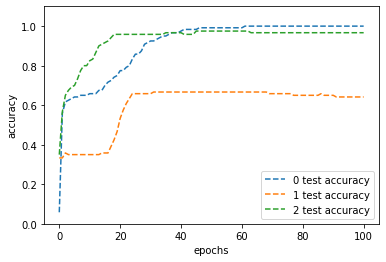

In [7]:
x = np.arange(len(reg0.train_accuracylist))
plt.plot(x, reg0.train_accuracylist, label='0 test accuracy', linestyle='--')
plt.plot(x, reg1.train_accuracylist, label='1 test accuracy', linestyle='--')
plt.plot(x, reg2.train_accuracylist, label='2 test accuracy', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.show()

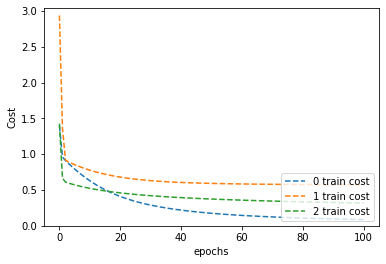

In [8]:
maxlist = [max(reg0.train_costlist),max(reg1.train_costlist),max(reg2.train_costlist)]
maxcost = max(maxlist)

x = np.arange(len(reg0.train_costlist))
plt.plot(x, reg0.train_costlist, label='0 train cost', linestyle='--')
plt.plot(x, reg1.train_costlist, label='1 train cost', linestyle='--')
plt.plot(x, reg2.train_costlist, label='2 train cost', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("Cost")
plt.ylim(0,maxcost+0.1)
plt.legend(loc='lower right')
plt.show()